In [1]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pycaret.classification import *
from pycaret.regression import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pm_data = pd.read_csv("clean_data\\cleaned_data.csv")
pm_data["timestamp"] = pd.to_datetime(pm_data["timestamp"])
print(pm_data)

               timestamp   humidity     pm_2_5  temperature
0    2021-08-16 07:00:00  97.712066   5.979462    24.220945
1    2021-08-17 07:00:00  95.922874   9.142292    24.807743
2    2021-08-18 07:00:00  87.291672   7.901869    26.346601
3    2021-08-19 07:00:00  86.124131  10.989553    27.062054
4    2021-08-20 07:00:00  89.532874   8.201077    26.208938
...                  ...        ...        ...          ...
1995 2021-10-17 06:00:00  91.460667   0.017094    22.848063
1996 2021-10-17 07:00:00  89.727773   0.008621    22.995754
1997 2021-10-17 08:00:00  86.384701   0.000000    23.557021
1998 2021-10-17 09:00:00  85.498444   0.025641    23.630604
1999 2021-10-17 10:00:00  77.589990   0.000000    25.050899

[2000 rows x 4 columns]


In [4]:
s = setup(pm_data, target = 'humidity', session_id = 123,date_features=["timestamp"],normalize=True)

,Description,Value
0,Session id,123
1,Target,humidity
2,Target type,Regression
3,Original data shape,"(2000, 4)"
4,Transformed data shape,"(2000, 6)"
5,Transformed train set shape,"(1400, 6)"
6,Transformed test set shape,"(600, 6)"
7,Numeric features,2
8,Date features,1
9,Preprocess,True


In [5]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.7866,7.4439,2.7015,0.9317,0.0346,0.0226,0.1170
rf,Random Forest Regressor,1.8725,7.9738,2.7946,0.9267,0.0360,0.0236,0.1580
lightgbm,Light Gradient Boosting Machine,1.8242,8.0748,2.8131,0.9257,0.0364,0.0230,0.1240
gbr,Gradient Boosting Regressor,1.9924,8.8286,2.9433,0.9193,0.0376,0.0249,0.0820
knn,K Neighbors Regressor,1.9757,9.3018,3.0123,0.9140,0.0391,0.0251,0.0280
dt,Decision Tree Regressor,2.4911,14.8724,3.8159,0.8630,0.0494,0.0314,0.0260
ada,AdaBoost Regressor,3.4264,18.8716,4.3340,0.8266,0.0520,0.0409,0.0680
lar,Least Angle Regression,4.1372,36.6662,6.0348,0.6630,0.0742,0.0520,0.0240
br,Bayesian Ridge,4.1422,36.6653,6.0348,0.6630,0.0742,0.0520,0.0250
ridge,Ridge Regression,4.1393,36.6656,6.0348,0.6630,0.0742,0.0520,0.0250


In [6]:
best_model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7458,7.5669,2.7508,0.9181,0.0339,0.0214
1,1.8894,7.4765,2.7343,0.9376,0.0362,0.0241
2,1.9273,9.7957,3.1298,0.9154,0.0397,0.0240
3,1.5992,4.8228,2.1961,0.9579,0.0278,0.0201
4,1.9770,8.2609,2.8742,0.9178,0.0368,0.0250
5,2.0182,10.3347,3.2148,0.9063,0.0421,0.0265
6,1.8404,9.2982,3.0493,0.9232,0.0401,0.0236
7,1.7511,5.7186,2.3914,0.9472,0.0308,0.0219
8,1.4282,3.9680,1.9920,0.9598,0.0254,0.0179


In [7]:
best_model_tune = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2518,11.9706,3.4599,0.8705,0.0431,0.0273
1,2.2469,9.0069,3.0012,0.9249,0.0395,0.0289
2,2.4892,12.4073,3.5224,0.8929,0.0450,0.0312
3,2.0358,7.6540,2.7666,0.9331,0.0346,0.0251
4,2.2227,10.3252,3.2133,0.8972,0.0407,0.0277
5,2.5497,14.8842,3.8580,0.8650,0.0505,0.0332
6,2.1334,9.8318,3.1356,0.9188,0.0420,0.0270
7,2.1655,7.7204,2.7786,0.9288,0.0348,0.0266
8,2.0442,6.8891,2.6247,0.9303,0.0319,0.0249


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [8]:
ensem_best_model = ensemble_model(best_model_tune, n_estimators = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8000,8.0021,2.8288,0.9134,0.0352,0.0221
1,1.8782,6.9269,2.6319,0.9422,0.0344,0.0239
2,2.0218,10.0045,3.1630,0.9136,0.0403,0.0253
3,1.5565,4.8269,2.1970,0.9578,0.0277,0.0194
4,1.9500,8.4405,2.9053,0.9160,0.0374,0.0246
5,2.0583,10.9187,3.3043,0.9010,0.0434,0.0270
6,1.7783,8.7436,2.9570,0.9278,0.0391,0.0228
7,1.7183,5.2176,2.2842,0.9519,0.0293,0.0214
8,1.4621,3.9745,1.9936,0.9598,0.0249,0.0180


In [10]:
now = pd.Timestamp.now()
startdate = now.date()
enddate = startdate + pd.DateOffset(days=7)
next_week = pd.date_range(start=startdate, end=enddate, freq='D')

In [11]:
next_data = pd.DataFrame({'timestamp': next_week})
next_data['pm_2_5'] = pm_data['pm_2_5'].mean().round(2)
next_data['humidity'] = pm_data['humidity'].mean().round(2)
next_data['temperature'] = pm_data['temperature'].mean().round(2)


In [13]:
predict = predict_model(ensem_best_model, data=next_data)
data_plot = pd.DataFrame(predict, columns=['timestamp', 'prediction_label'])
data_plot["prediction_label"] = data_plot["prediction_label"].round(2)
data_plot

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,15.2936,234.0242,15.2979,0.0000,0.1995,0.1830


,timestamp,prediction_label
0,2025-03-13,67.68
1,2025-03-14,67.87
2,2025-03-15,68.02
3,2025-03-16,68.38
4,2025-03-17,68.75
5,2025-03-18,68.68
6,2025-03-19,68.49
7,2025-03-20,68.42


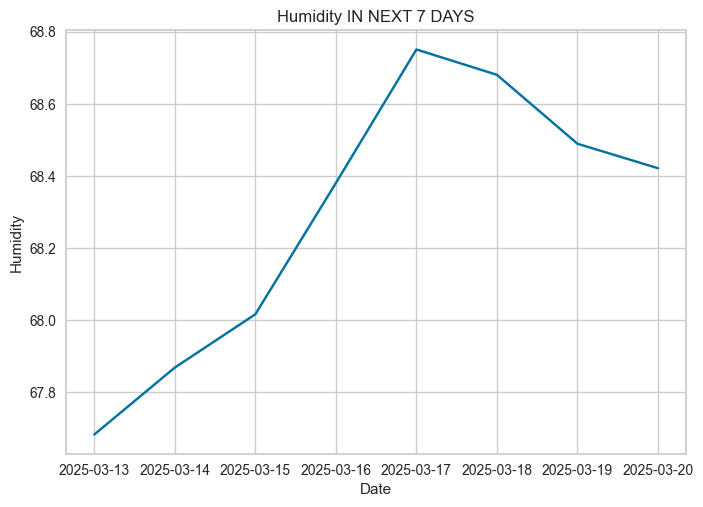

In [14]:
plt.plot(next_week, predict['prediction_label'])
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity IN NEXT 7 DAYS')
plt.grid(True)
plt.show()

In [18]:
save_model(ensem_best_model,'humidity')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['timestamp'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['pm_2_5', 'temperature'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model',
                  BaggingRegressor(estimator=ExtraTreesRegressor(n_jobs=-1,
                                                                 random_state=123),
                                   n_estimators=50, random_state=123))]),
 'humidity.pkl')

In [16]:
predict_humidity = pm_data
cleaned_file_path = ('D:\\7\\66-psu\\year2\\semester2\\ba ai\\termpro-predictPM25\\trainpredict_humidity.csv')
predict_humidity.to_csv(cleaned_file_path, index=False)